<a href="https://colab.research.google.com/github/durgaprasaddp72/Car_Price_Prediction/blob/main/carprice_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

print("Libraries imported successfully, warnings ignored, and pandas display options set.")


Libraries imported successfully, warnings ignored, and pandas display options set.


In [ ]:
df=pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
print(f"number of rows in a dataset  :{df.shape[0]}")
print(f"number of columns in a dataset  :{df.shape[1]}")

number of rows in a dataset  :19237
number of columns in a dataset  :18


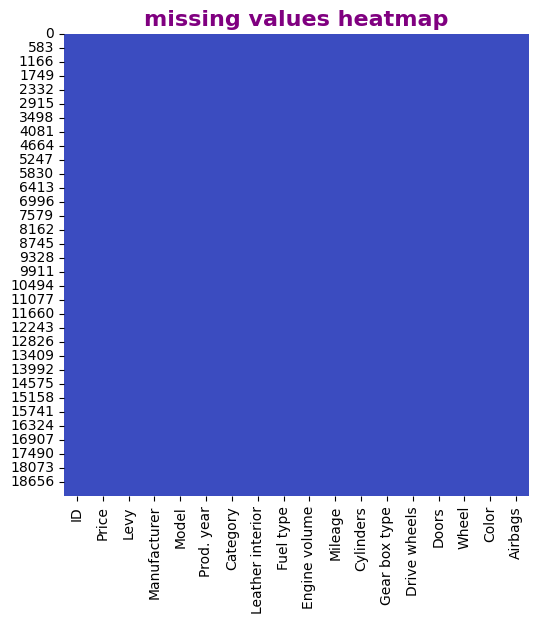

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),cmap="coolwarm",cbar=False)
plt.title("missing values heatmap",fontsize=16,fontweight="bold",color="purple")
plt.show()

In [ ]:
print(f"number of duplicated value in dataset  :{df.duplicated().sum()}")

number of duplicated value in dataset  :313


In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,19237.00,19237.00,19237.00,19237.00,19237.00
mean,45576535.89,18555.93,2010.91,4.58,6.58
std,936591.42,190581.27,5.67,1.20,4.32
min,20746880.00,1.00,1939.00,1.00,0.00
25%,45698374.00,5331.00,2009.00,4.00,4.00
50%,45772308.00,13172.00,2012.00,4.00,6.00
75%,45802036.00,22075.00,2015.00,4.00,12.00
max,45816654.00,26307500.00,2020.00,16.00,16.00


In [ ]:
cols=[]
for col in df.columns:
  if df[col].dtype=="int64" or df[col].dtype=="float64":
    cols.append(col)

In [ ]:
corr_matrix=df[cols].corr()

In [ ]:
corr_matrix

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.00,-0.00,0.07,-0.04,-0.02
Price,-0.00,1.00,0.01,0.01,-0.01
Prod. year,0.07,0.01,1.00,-0.10,0.24
Cylinders,-0.04,0.01,-0.10,1.00,0.18
Airbags,-0.02,-0.01,0.24,0.18,1.00


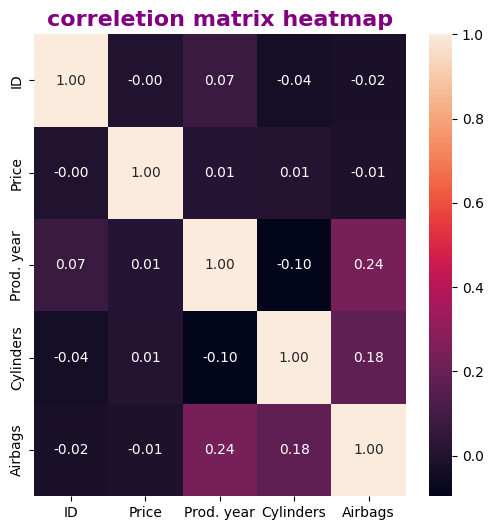

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,color="green",fmt=".2f")
plt.title("correletion matrix heatmap",fontsize=16,fontweight="bold",color="purple")
plt.show()

In [ ]:
for co in df.columns[1:]:
  x=df[co].value_counts()
  print(f"value counts of the column{col} : {x}")
  print("="*60)

value counts of the columnAirbags : Price
15681     280
470       274
14113     244
392       242
314       235
         ... 
22279       1
10973       1
111002      1
7310        1
6400        1
Name: count, Length: 2315, dtype: int64
value counts of the columnAirbags : Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
676        1
1678       1
1369       1
328        1
955        1
Name: count, Length: 559, dtype: int64
value counts of the columnAirbags : Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
value counts of the columnAirbags : Model
Prius               1083
Sonata              1079
Camry                938
Elantra              922
E 350                542
                    ... 
Tiguan SE           

In [ ]:
def plot_hist_kde_box(col,data=df):
  plt.figure(figsize=(15,5))

#plot histogram
  plt.subplot(1,3,1)
  sns.histplot(data[col],kde=True,color='b')
  plt.title(f"{col.capitalize()}Distribution",fontsize=16,fontweight='bold',color="purple")
  plt.xlabel(col.capitalize(),fontsize=14)
  plt.ylabel("frequency",fontsize=14)

  plt.subplot(1, 3, 2)
  sns.kdeplot(data=data, x=col, fill=True, color='r')
  plt.title(f"Kernel Density Estimate of {col.capitalize()}", fontsize=16, fontweight='bold', color='purple')
  plt.xlabel(col.capitalize(), fontsize=14)
  plt.ylabel("Density", fontsize=14)
  plt.xlim(data[col].min(), data[col].max())

  # Plot Box Plot
  plt.subplot(1, 3, 3)
  sns.boxplot(y=data[col], color='g')
  plt.title(f"Box Plot of {col.capitalize()}", fontsize=16, fontweight='bold', color='purple')
  plt.xlabel(col.capitalize(), fontsize=14)

  plt.tight_layout()
  plt.show()

In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

the plots of Airbagsis


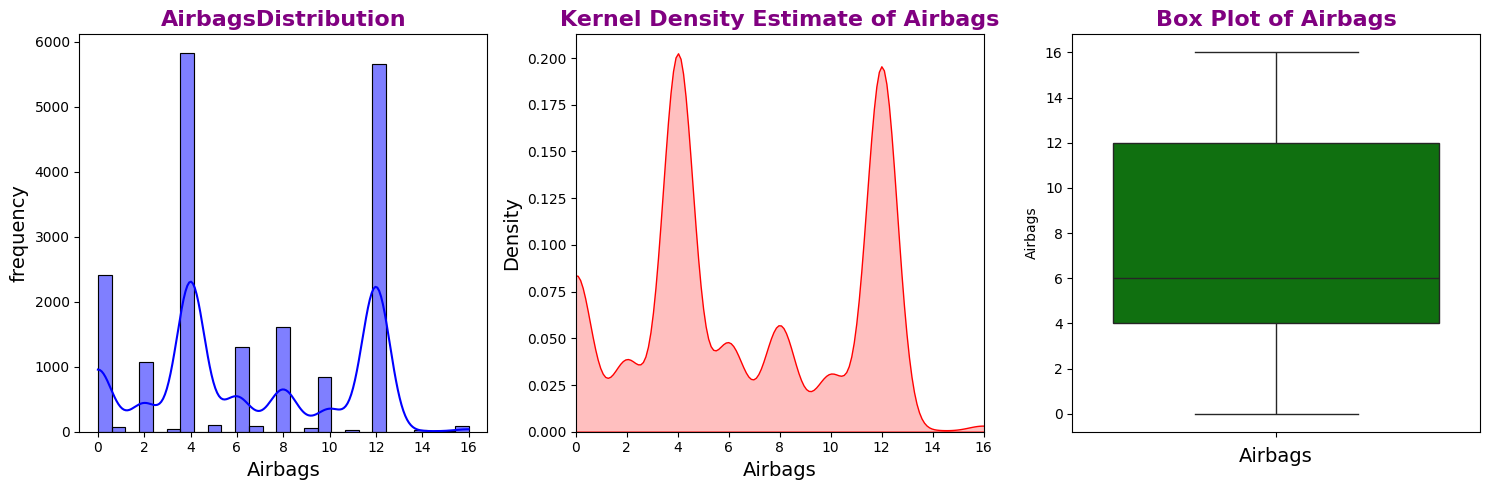

the plots of Prod. yearis


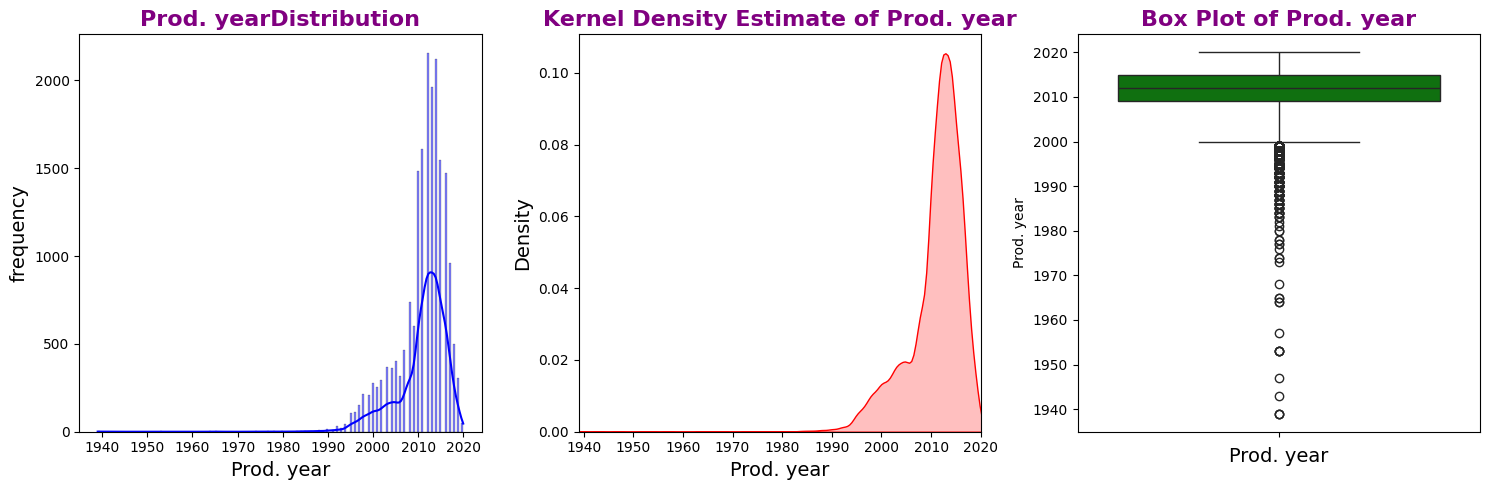

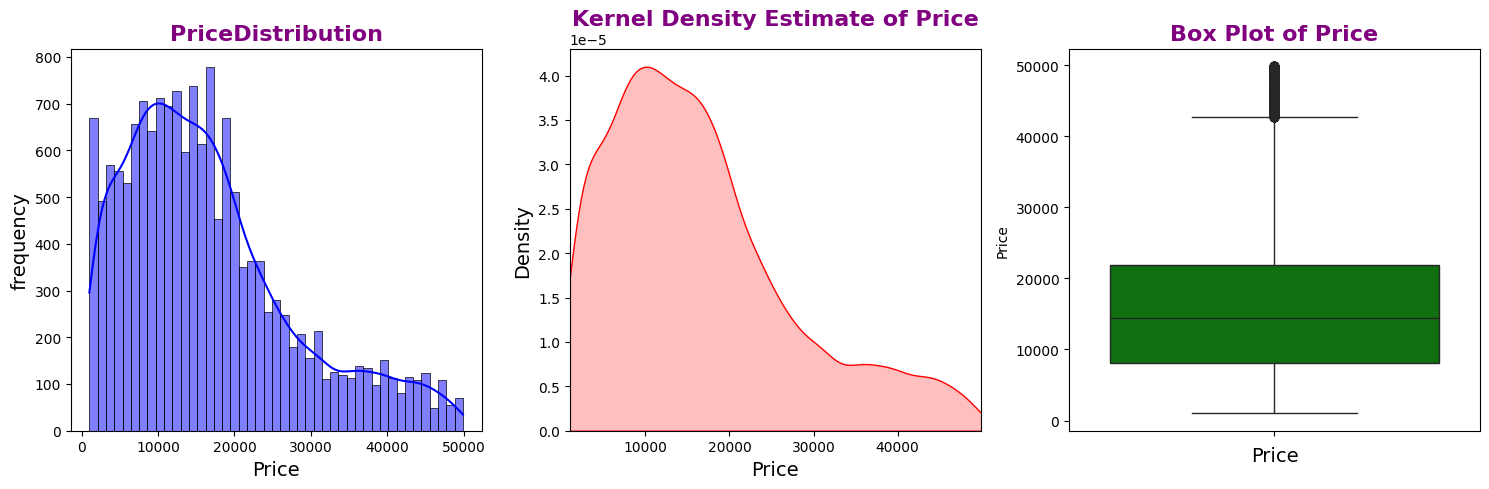

In [ ]:
for col in ["Airbags","Prod. year"]:
  print(f"the plots of {col}is")
  plot_hist_kde_box(col)

  print("="*40)
filter_df = df[(df['Price'] > 1000) & (df['Price'] < 50000)]
plot_hist_kde_box("Price",filter_df)


In [ ]:
def plot_pie_count(column_name, data=df):
    plt.figure(figsize=(15, 5))

    # Pie Plot
    plt.subplot(1, 2, 1)
    data[column_name].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {column_name.capitalize()}', fontsize=16, fontweight='bold', color='purple')
    plt.ylabel('')

    # Count Plot
    plt.subplot(1, 2, 2)
    sns.countplot(x=column_name, data=data, palette='viridis')
    plt.title(f'Count of {column_name.capitalize()}', fontsize=16, fontweight='bold', color='purple')
    plt.xlabel(column_name.capitalize(), fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
cacols=[]
for col in df.columns:
  if df[col].dtype=="object":
    cacols.append(col)

plots of the category Levy is>>>>>>>>


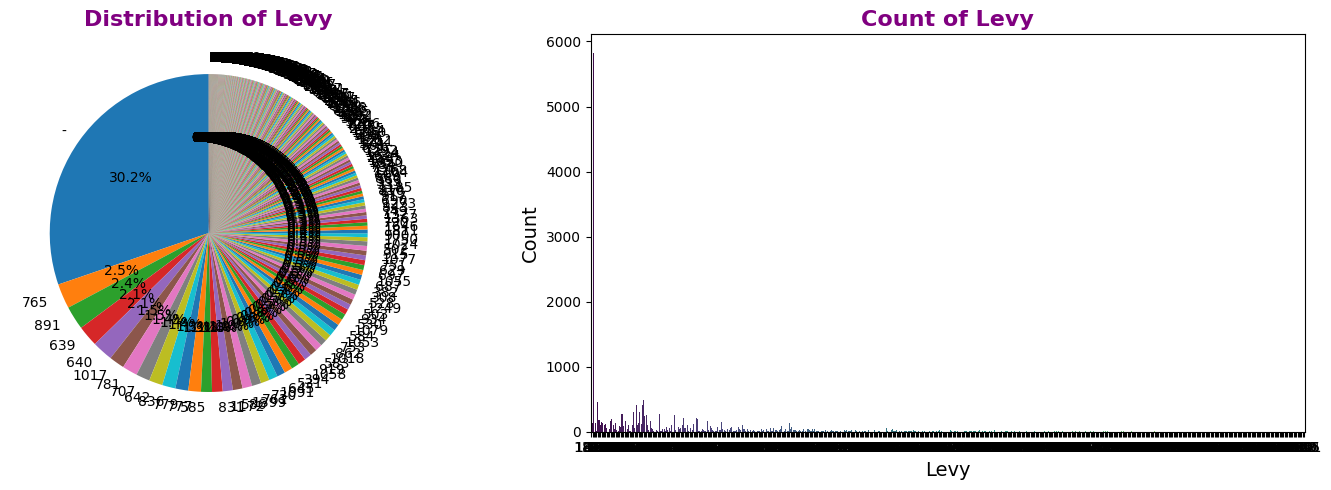

plots of the category Manufacturer is>>>>>>>>


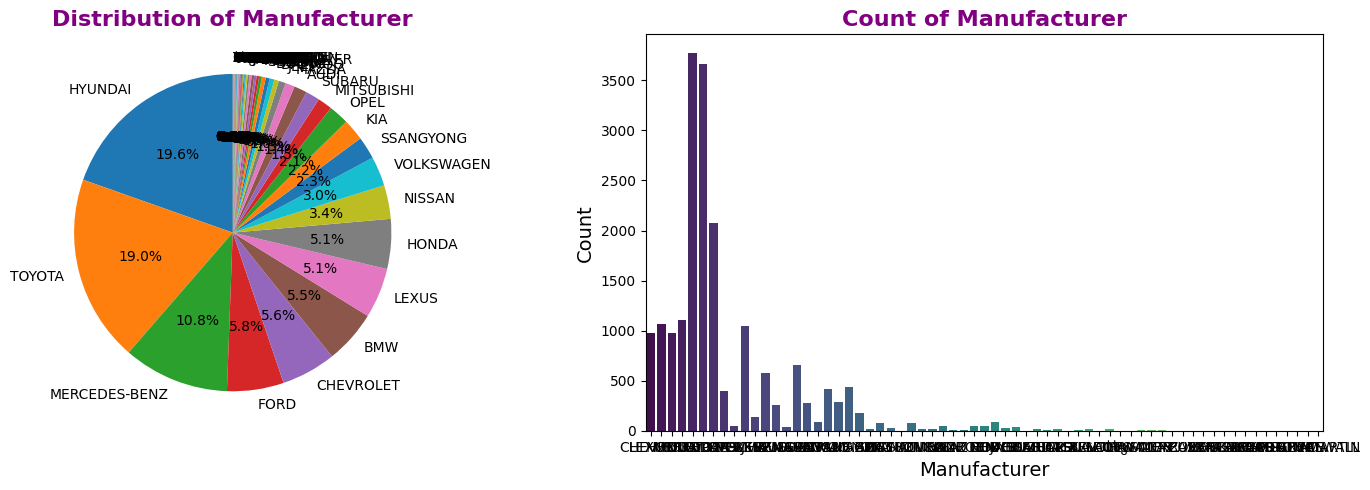

plots of the category Model is>>>>>>>>


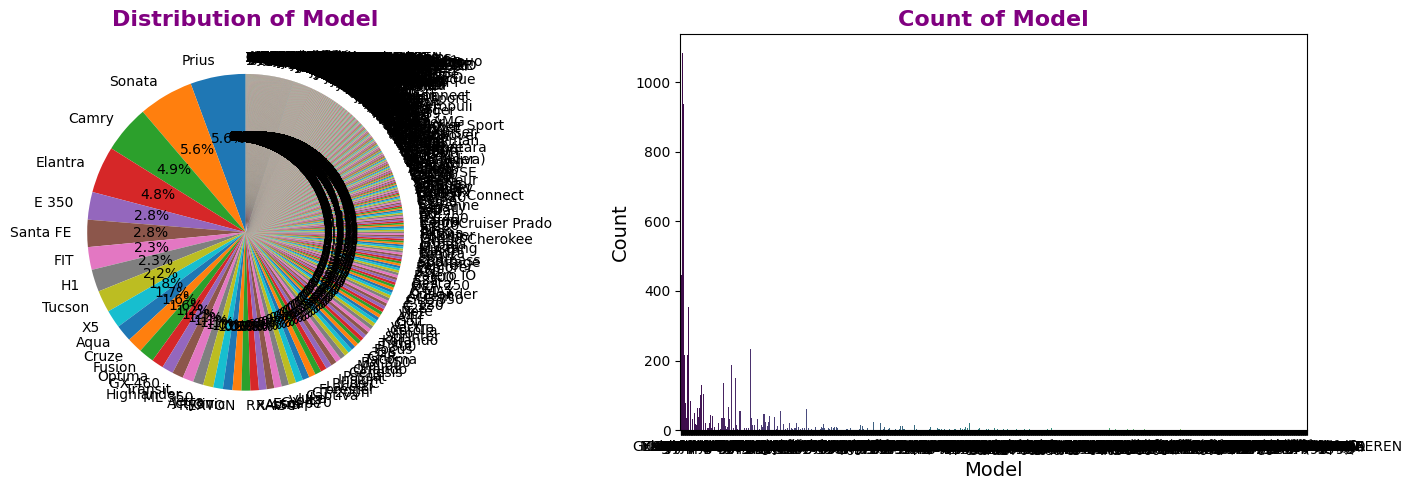

plots of the category Category is>>>>>>>>


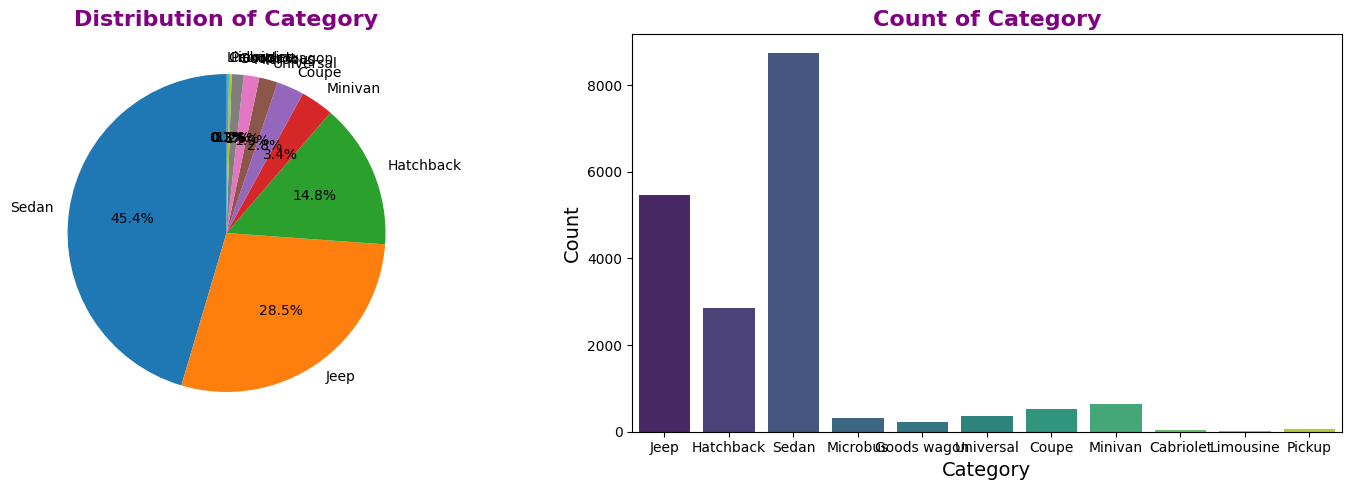

plots of the category Leather interior is>>>>>>>>


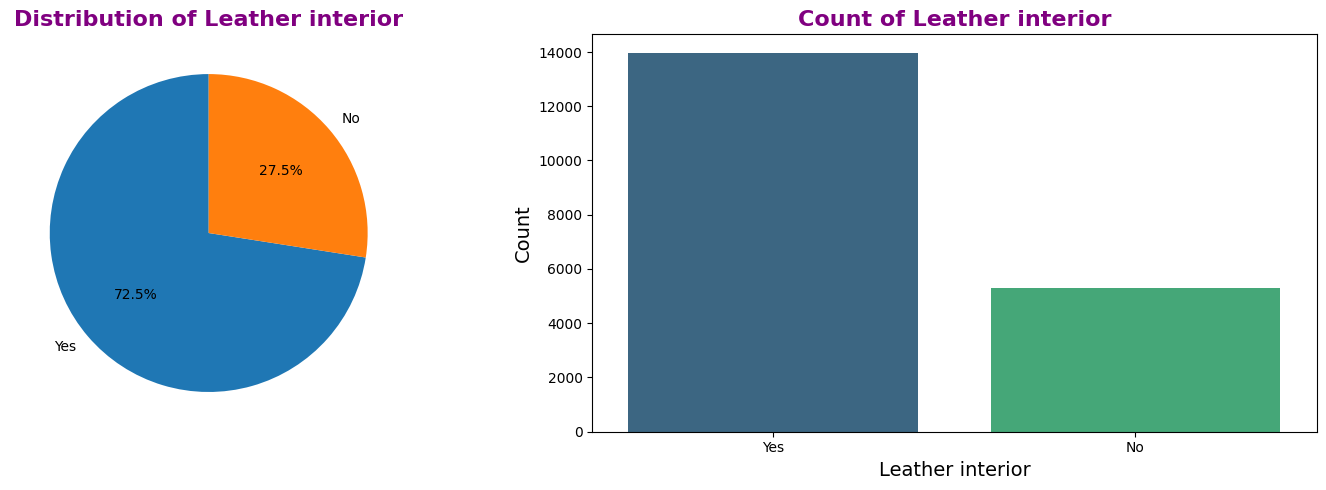

plots of the category Fuel type is>>>>>>>>


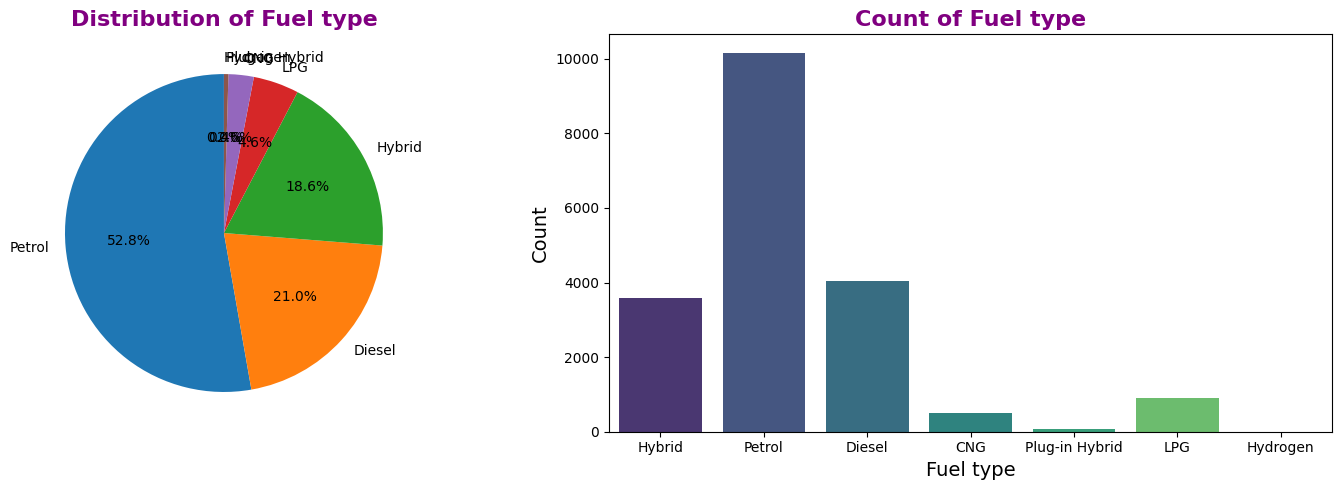

plots of the category Engine volume is>>>>>>>>


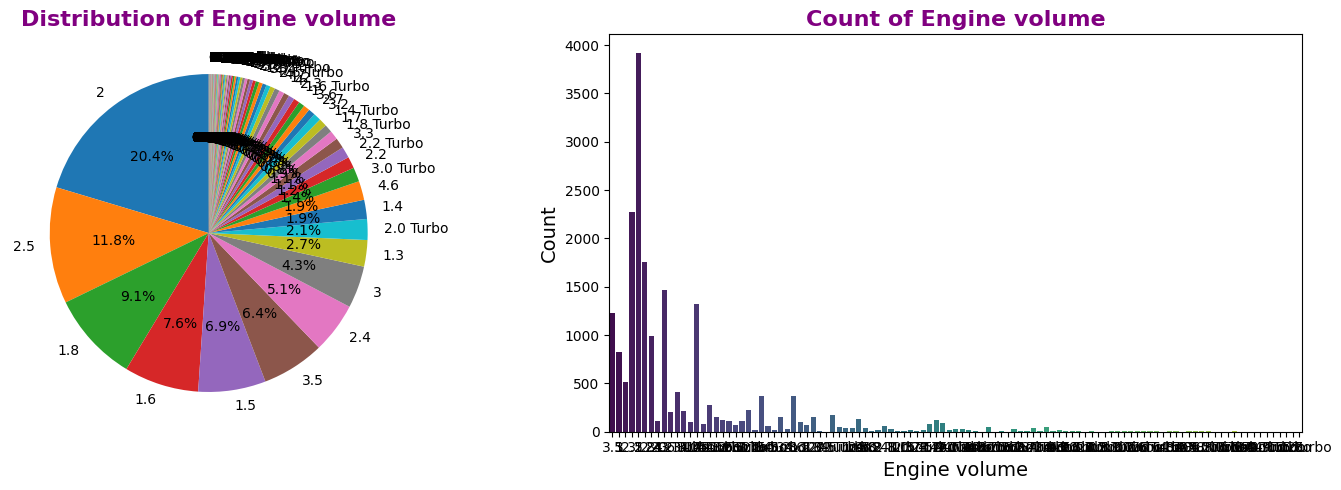

plots of the category Mileage is>>>>>>>>


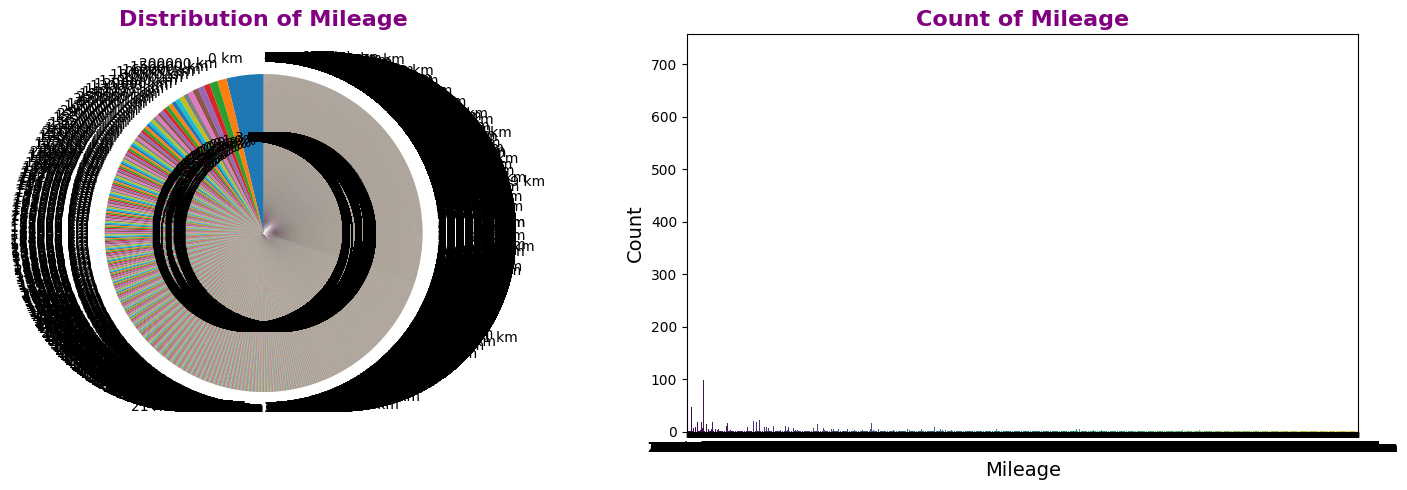

plots of the category Gear box type is>>>>>>>>


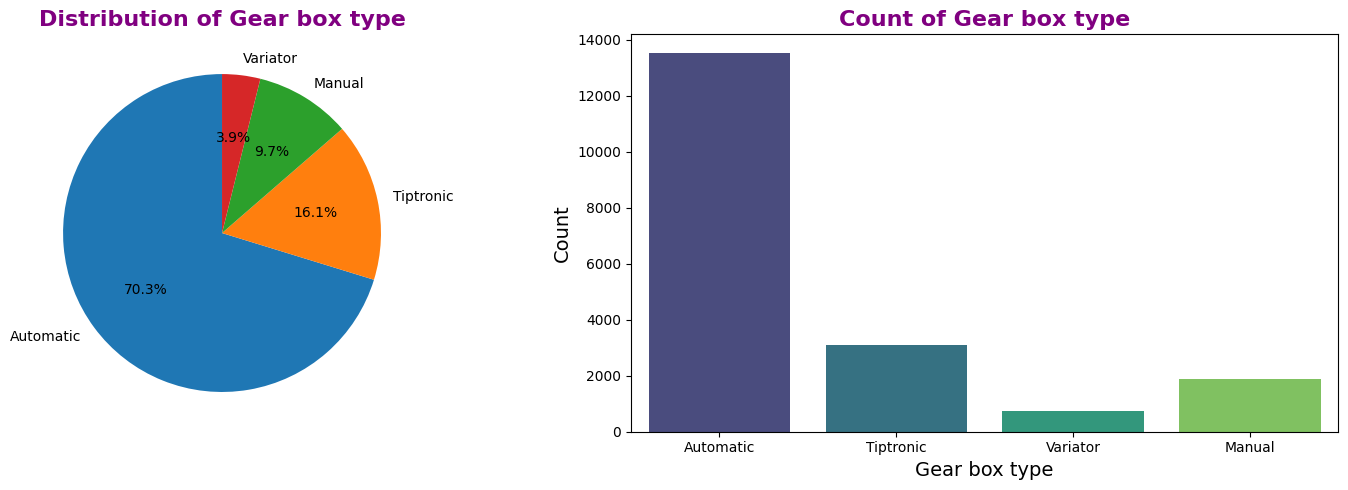

plots of the category Drive wheels is>>>>>>>>


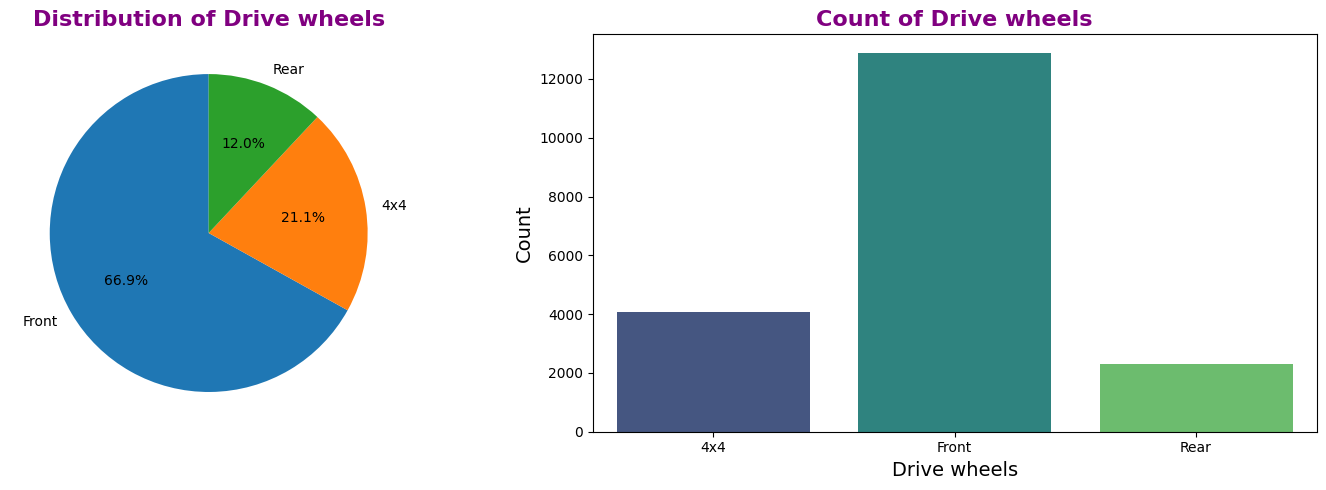

plots of the category Doors is>>>>>>>>


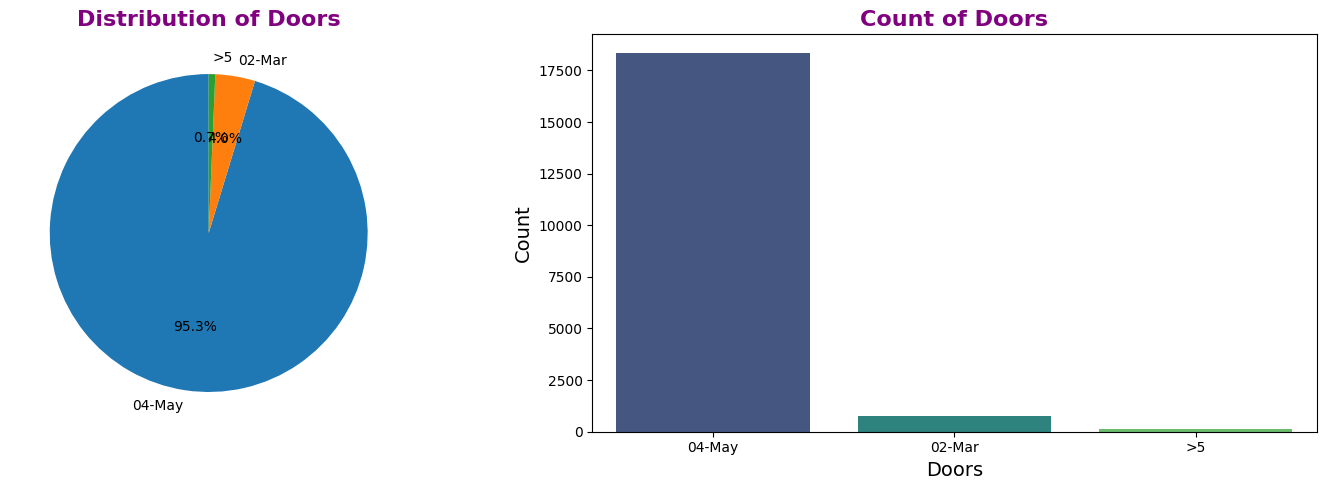

plots of the category Wheel is>>>>>>>>


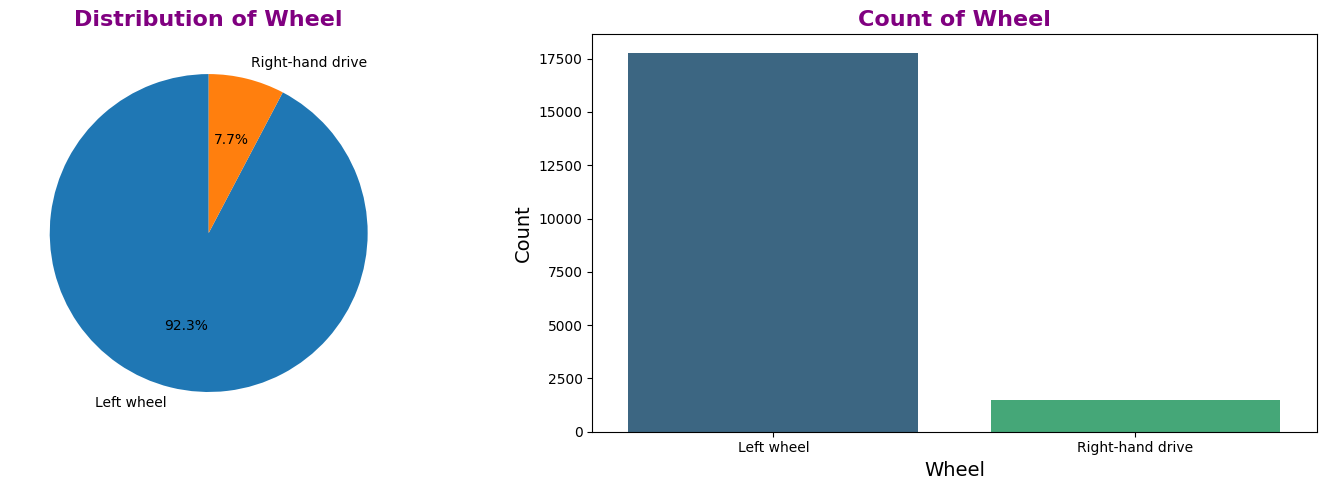

plots of the category Color is>>>>>>>>


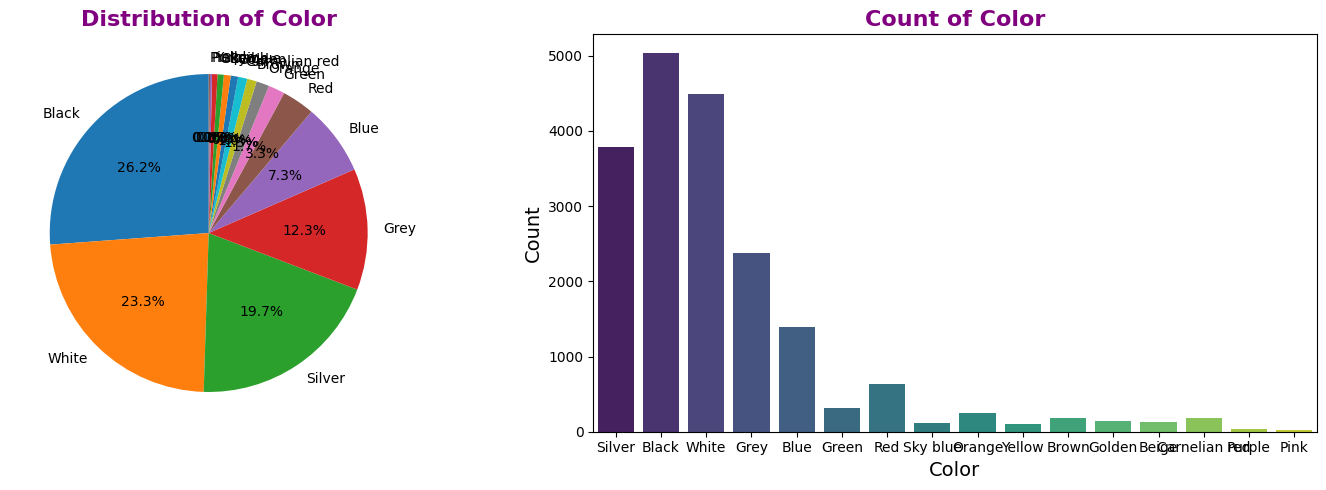

In [ ]:
for col in cacols:
  print(f"plots of the category {col} is>>>>>>>>")

  plot_pie_count(col)
  print("="*40)


In [ ]:
cols

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [ ]:


filter_df = df[(df['Price'] > 1000) & (df['Price'] < 50000)]
cols_to_plot = [col for col in cols if col not in ['Price', 'ID']]


In [ ]:
def plot_scatter(column_name, data=filter_df, target='Price'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=column_name, y=target,)
    plt.title(f'Scatter Plot of {column_name.capitalize()} vs {target.capitalize()}', fontsize=16, fontweight='bold', color='purple')
    plt.xlabel(column_name.capitalize(), fontsize=14)
    plt.ylabel(target.capitalize(), fontsize=14)
    plt.grid(True)
    plt.show()

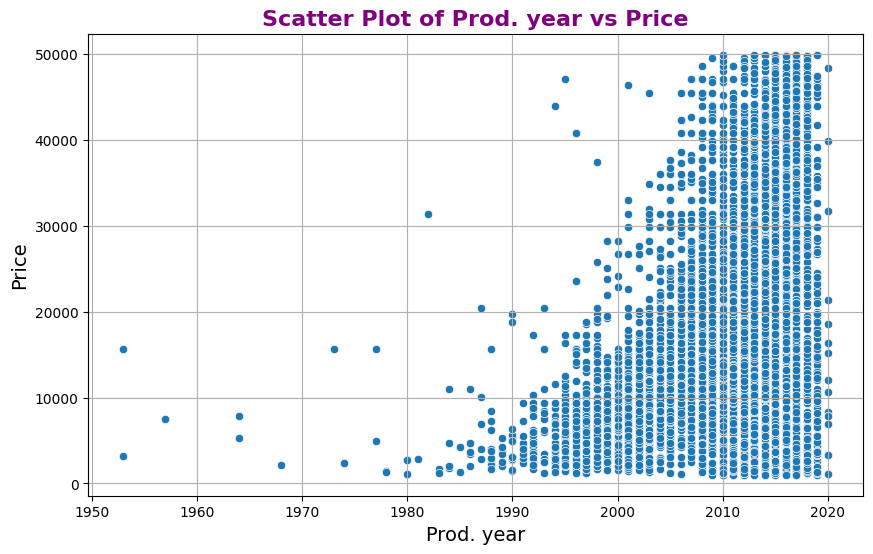

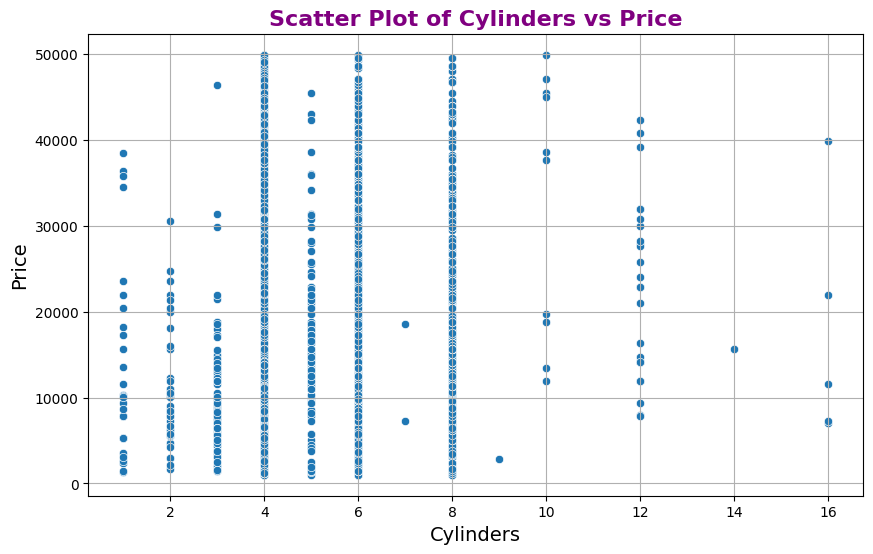

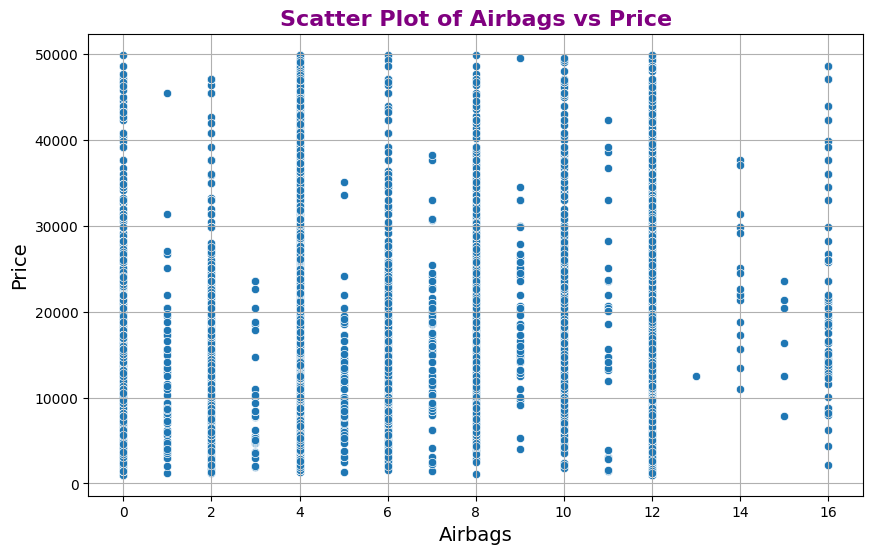

In [ ]:
for col in cols_to_plot:
  plot_scatter(col)
  print("="*20)

In [ ]:
df.drop(["ID"],axis=1,inplace=True)

In [ ]:
min_val=1000
max_val=100000
clean_dff=df[(df["Price"]>=min_val)&(df["Price"]<=max_val)]
total_rows=len(df)
valid_rows=len(clean_dff)
invalid_rows=total_rows-valid_rows
percent_of_invalid=invalid_rows/total_rows*100
print(f"total rows are: {total_rows}")
print(f"total valid rows are: {valid_rows}")
print(f"total invalid rows are: {invalid_rows}")
print(f"the percentage of invalid rows is: {round(percent_of_invalid,2)}")

total rows are: 19237
total valid rows are: 16550
total invalid rows are: 2687
the percentage of invalid rows is: 13.97


In [ ]:
df_clean=clean_dff.copy()#shallow copy

In [ ]:
df_clean['Levy'] = pd.to_numeric(df_clean['Levy'], errors='coerce')
df_clean['Engine volume'] = pd.to_numeric(df_clean['Engine volume'], errors='coerce').astype(float)
df_clean['Mileage'] = df_clean['Mileage'].str.replace('km', '').str.strip().astype(float)

In [ ]:
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def merge_rare_categories(series, threshold=100):
    value_counts = series.value_counts()
    rare = value_counts[value_counts < threshold].index
    return series.apply(lambda x: 'Other' if x in rare else x)

for col in ['Manufacturer', 'Model']:
    X_train[col] = merge_rare_categories(X_train[col])
    X_test[col] = merge_rare_categories(X_test[col])

In [ ]:
def merge_rare_categories(series, threshold=100):
    value_counts = series.value_counts()
    rare = value_counts[value_counts < threshold].index
    return series.apply(lambda x: 'Other' if x in rare else x)

for col in ['Manufacturer', 'Model']:
    X_train[col] = merge_rare_categories(X_train[col])
    X_test[col] = merge_rare_categories(X_test[col])

In [ ]:
target_encoder = TargetEncoder(cols=['Manufacturer', 'Model'])
X_train[['Manufacturer', 'Model']] = target_encoder.fit_transform(
    X_train[['Manufacturer', 'Model']], y_train
)
X_test[['Manufacturer', 'Model']] = target_encoder.transform(
    X_test[['Manufacturer', 'Model']]
)

In [ ]:
for col in ['Category', 'Color']:
    freq_map = X_train[col].value_counts(normalize=True)
    X_train[col] = X_train[col].map(freq_map)
    X_test[col] = X_test[col].map(freq_map)
    # For unseen categories in test
    X_test[col].fillna(0, inplace=True)

In [ ]:
binary_cols = ['Leather interior', 'Wheel']
for col in binary_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [ ]:
door_map = {
    '02-Mar': 2,
    '04-May': 4,
    '>5': 5
}
X_train['Doors'] = X_train['Doors'].map(door_map)
X_test['Doors'] = X_test['Doors'].map(door_map)

In [ ]:
onehot_cols = ['Fuel type', 'Gear box type', 'Drive wheels']
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

ohe_train = ohe.fit_transform(X_train[onehot_cols]).toarray()
ohe_test = ohe.transform(X_test[onehot_cols]).toarray()

ohe_columns = ohe.get_feature_names_out(onehot_cols)
X_train_ohe = pd.DataFrame(ohe_train, columns=ohe_columns, index=X_train.index)
X_test_ohe = pd.DataFrame(ohe_test, columns=ohe_columns, index=X_test.index)

X_train = pd.concat([X_train.drop(onehot_cols, axis=1), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(onehot_cols, axis=1), X_test_ohe], axis=1)

In [ ]:
X_train.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,...,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
11544,45212809,779.00,17212.39,16123.83,2013,0.46,1,2.50,166720.00,4.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
5844,45759862,1363.00,26670.21,42657.34,2012,0.27,1,4.60,255406.00,8.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4001,45798340,NaN,12820.34,13279.45,2016,0.46,1,NaN,32000.00,4.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
17518,45787021,694.00,19751.06,17397.80,2014,0.02,0,2.20,160000.00,5.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
12247,45811135,NaN,17212.39,17397.80,2003,0.04,0,2.00,195000.00,4.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13240 entries, 11544 to 18378
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13240 non-null  int64  
 1   Levy                      8942 non-null   float64
 2   Manufacturer              13240 non-null  float64
 3   Model                     13240 non-null  float64
 4   Prod. year                13240 non-null  int64  
 5   Category                  13240 non-null  float64
 6   Leather interior          13240 non-null  int64  
 7   Engine volume             11781 non-null  float64
 8   Mileage                   13240 non-null  float64
 9   Cylinders                 13240 non-null  float64
 10  Doors                     13240 non-null  int64  
 11  Wheel                     13240 non-null  int64  
 12  Color                     13240 non-null  float64
 13  Airbags                   13240 non-null  int64  
 14  Fuel ty

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

In [ ]:
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared (R2): {r2 * 100:.4f}%")
    print("\n")

    return mse, rmse, r2

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

model_results_list = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, rmse, r2 =  evaluate_model(y_test, y_pred, name)
    model_results_list.append([name, mse, rmse, r2])

Training Linear Regression...
Metrics for Linear Regression:
MSE: 157570452.3797
RMSE: 12552.7070
R-squared (R2): 32.5534%


Training Ridge Regression...
Metrics for Ridge Regression:
MSE: 157573572.9088
RMSE: 12552.8313
R-squared (R2): 32.5521%


Training Lasso Regression...
Metrics for Lasso Regression:
MSE: 157589315.3184
RMSE: 12553.4583
R-squared (R2): 32.5453%


Training Elastic Net Regression...
Metrics for Elastic Net Regression:
MSE: 181936065.9444
RMSE: 13488.3678
R-squared (R2): 22.1239%


Training Decision Tree Regression...
Metrics for Decision Tree Regression:
MSE: 112491627.4994
RMSE: 10606.2070
R-squared (R2): 51.8490%


Training Random Forest Regression...
Metrics for Random Forest Regression:
MSE: 58468350.0650
RMSE: 7646.4600
R-squared (R2): 74.9732%


Training Gradient Boosting Regression...
Metrics for Gradient Boosting Regression:
MSE: 100909068.6139
RMSE: 10045.3506
R-squared (R2): 56.8068%


Training Support Vector Regression...
Metrics for Support Vector Regres

In [ ]:
result_df = pd.DataFrame(model_results_list, columns=['Model', 'MSE', 'RMSE', 'R2'])
result_df.sort_values(by='R2', ascending=False)

,Model,MSE,RMSE,R2
5,Random Forest Regression,58468350.07,7646.46,0.75
9,XGBoost Regression,64112712.00,8007.04,0.73
6,Gradient Boosting Regression,100909068.61,10045.35,0.57
4,Decision Tree Regression,112491627.50,10606.21,0.52
8,K-Nearest Neighbors Regression,123065616.43,11093.49,0.47
0,Linear Regression,157570452.38,12552.71,0.33
1,Ridge Regression,157573572.91,12552.83,0.33
2,Lasso Regression,157589315.32,12553.46,0.33
3,Elastic Net Regression,181936065.94,13488.37,0.22
7,Support Vector Regression,246376098.37,15696.37,-0.05


In [ ]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='r2', verbose=1)

In [ ]:
print("Best R2 Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best R2 Score: 0.8074754118919373
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
evaluate_model(y_test, y_pred, 'XGBoost Regression (Fine Tuned)')

Metrics for XGBoost Regression (Fine Tuned):
MSE: 55026428.0000
RMSE: 7417.9800
R-squared (R2): 76.4464%




(55026428.0, np.float64(7417.98004850377), 0.7644644379615784)

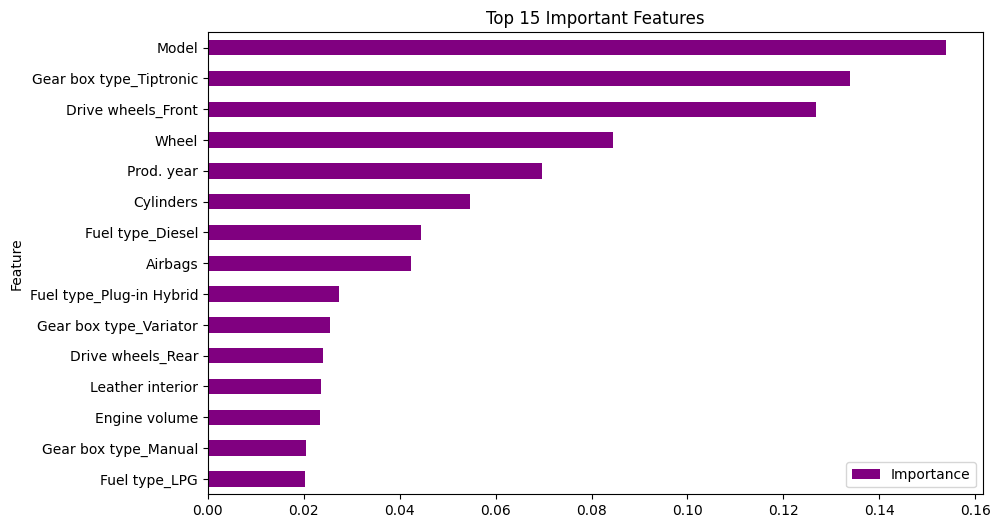

In [ ]:
importances = best_model.feature_importances_
feat_names = X_train.columns

feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(15).plot(
    x='Feature', y='Importance', kind='barh', figsize=(10, 6), color='purple'
)
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()

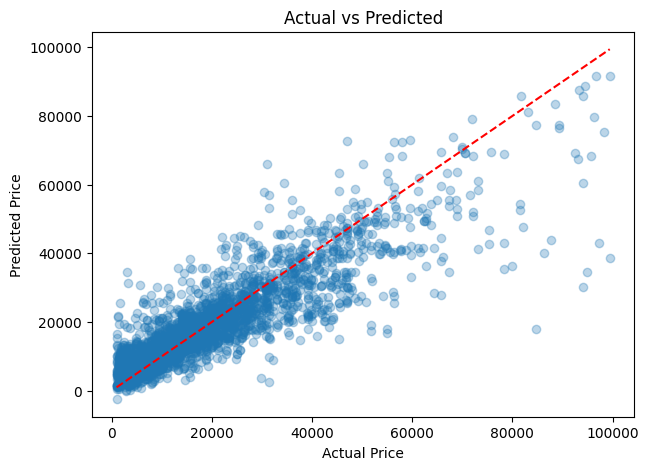

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()